## Run valve experiment
#### Input valve metadata (at least valve number) and run experiment to add test data to dictionary

In [1]:
import os
import pickle
import numpy as np
import time as time

from Experiment_Utils import Valve_Experiment,  valve_plot_dict_key

In [2]:
# FOR DEBUGGING - feel free to ignore.
%load_ext autoreload
%autoreload 2
from Experiment_Utils import Valve_Experiment,  valve_plot_dict_key

In [3]:
file_dir = '/home/gmc/Python/Mod_DOE'
# file_name = 'Taguchi_valve_dict.pkl'
file_name = 'initial_valve_dict.pkl'
Experiment_Runtime = 3 #s
Num_Experiment = 5 # trials

MEMBRANE = False # True if using a membrane before valve (needs to be reset between trials)

In [4]:
# Set design number - FOR TAGUCHI DESIGNS
Valve_Design_Number = 0

In [5]:
os.chdir(file_dir)
try:
    starting_dict = pickle.load(open(file_name, 'rb'))
except:
    print('Making new dict')
    starting_dict = {}

In [6]:
print(f'Current valve number: {Valve_Design_Number}')
raise RuntimeError("MAKE SURE YOU UPDATED THE VALVE NUMBER!!")

Current valve number: 0


RuntimeError: MAKE SURE YOU UPDATED THE VALVE NUMBER!!

In [7]:
in_dict = starting_dict.copy()
in_key = 'Taguchi_Design_' + str(Valve_Design_Number)
in_key = 'TESTING_' + str(Valve_Design_Number)
in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 3 seconds ...
Posting pressure vals, shape: 64
Key exists, appending


In [8]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [9]:
if Num_Experiment > 1:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 3 seconds ...
Posting pressure vals, shape: 76
Key exists, appending


In [10]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [11]:
if Num_Experiment > 2:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 3 seconds ...
Posting pressure vals, shape: 70
Key exists, appending


In [12]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [13]:
if Num_Experiment > 3:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 3 seconds ...
Posting pressure vals, shape: 72
Key exists, appending


In [14]:
if MEMBRANE:
    raise RuntimeError("Deflate before next test.")
else:
    time.sleep(2)

In [15]:
# Won't do more than 5 trials for now...
if Num_Experiment > 4:
    in_dict = Valve_Experiment(in_dict, Experiment_Runtime, in_key)

Running pump for 3 seconds ...
Posting pressure vals, shape: 58
Key exists, appending


### We can view the data from the latest (nth) test

TESTING_0_test_fig


/home/gmc/Python/Mod_DOE/Experiment_Utils.py:317: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(p1_time, p1_vals, c=color1[i], label='pressure')


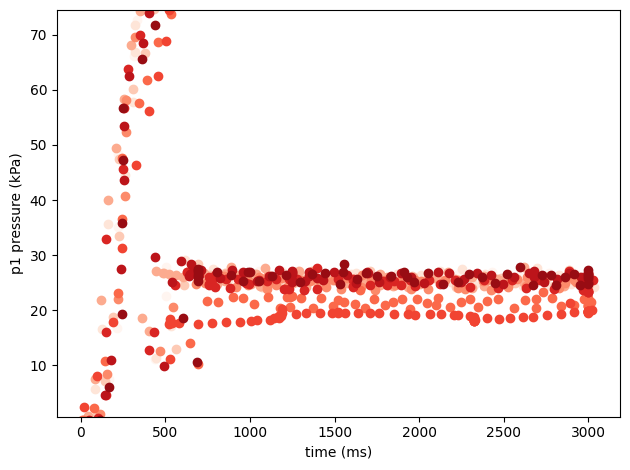

In [16]:
# load latest values
update_dict = in_dict # make sure plotted values are the ones updating
key = list(update_dict.keys())[-1]
# plot - TODO: pull the pressure differential from a function similar to valve_plot_dict_key, pull design parameters from Taguchi .csv, create entry for Ax
save_to = '/home/gmc/Documents/Valve_Design'
pic_name = in_key + "_test_fig"
print(pic_name)
valve_plot_dict_key(update_dict, key, save_loc = save_to)# , file_name = pic_name)

In [17]:
raise RuntimeError("MAKE SURE YOU WANT TO SAVE THIS DATA!!")

RuntimeError: MAKE SURE YOU WANT TO SAVE THIS DATA!!

In [60]:
os.chdir(file_dir)
pickle.dump(update_dict,open(file_name, 'wb'))